In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

LABELS_PATH = "Dataset/Total GT"
IMAGES_PATH = "Dataset/Total Images"

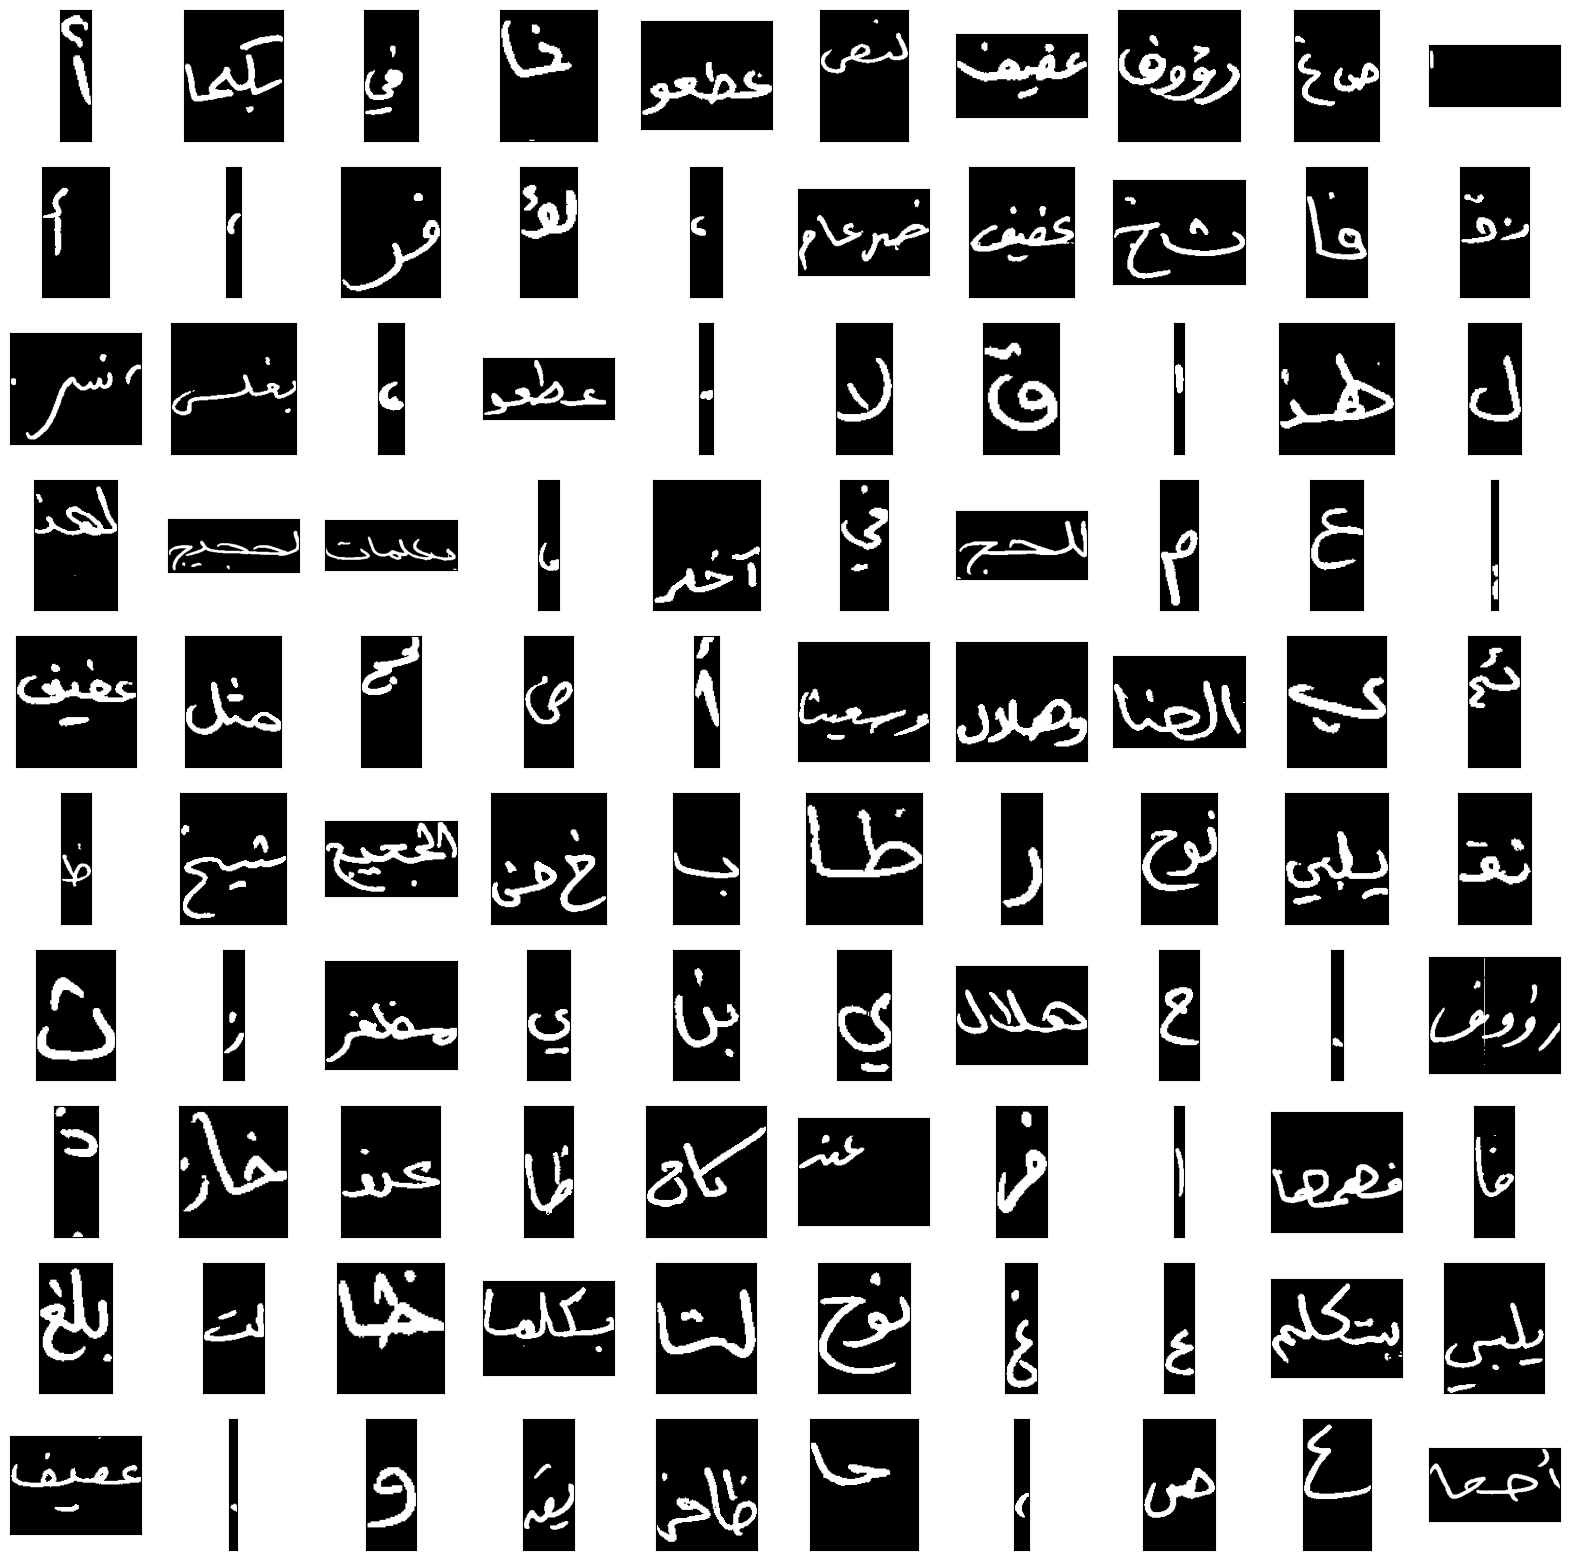

In [4]:
fig, axs = plt.subplots(10,10, figsize=(20,20))

for i in range(10):
    for j in range(10):
        image_name = random.choice(os.listdir(IMAGES_PATH))
        image = Image.open(os.path.join(IMAGES_PATH, image_name))
        axs[i,j].imshow(image, cmap="gray")
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

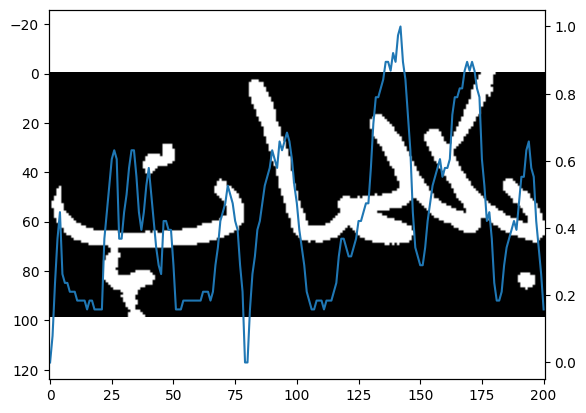

In [87]:
image_name = random.choice(os.listdir(IMAGES_PATH))
image = Image.open(os.path.join(IMAGES_PATH, image_name))

v_count = np.array(image).sum(axis=0)
v_count = v_count/v_count.max()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.imshow(image,cmap="gray")
ax2.plot(v_count)
plt.show()

`AHTD3A0211_Para1_4_word8.tif`

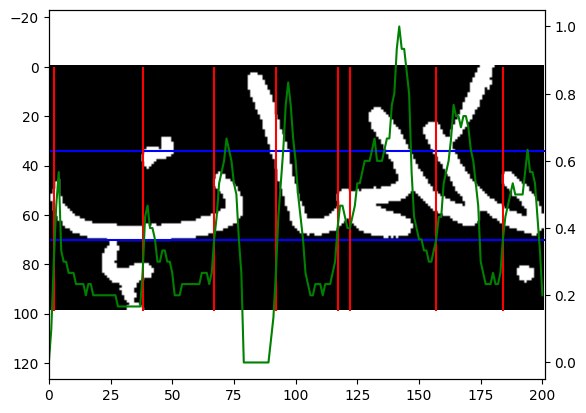

In [147]:
def get_core_zone(image_array, threshold=0.3):
    row_sums = image_array.sum(axis=1)
    row_sums = row_sums/row_sums.max()

    upper = np.argmax(row_sums>0.3)
    lower = height-np.argmax(np.flip(row_sums)>threshold)+1

    return row_sums, (upper, lower)

def split_word(image_array, core_zone, threshold=0.4):
    col_sums = image_array[core_zone[0]:core_zone[1]].sum(axis=0)
    col_sums = col_sums/col_sums.max()

    segment_indices = np.where(
        np.abs(
            np.diff(
                    (col_sums>threshold)  # Above threshold
                )  # Derivative
            ) == 1  # Where it abs value equals one
        )[0]

    return col_sums, segment_indices

image_array = np.array(image)
height, width = image_array.shape

row_sums, core_zone = get_core_zone(image_array, 0.5)
col_sums, segment_indices = split_word(image_array, core_zone)

fig, ax = plt.subplots()

ax.imshow(image_array, cmap="gray")
ax.hlines(core_zone[0], 0 ,width, color="b")
ax.hlines(core_zone[1], 0 ,width, color="b")

ax.twinx().plot(col_sums, color='g')

ax.vlines(segment_indices[::2], 0, height, color="r")

ax.set_xlim(0,width)

plt.show()

In [4]:
labels = set()
for label_file in os.listdir(LABELS_PATH):
    file_path = os.path.join(LABELS_PATH, label_file)
    with open(file_path, "r") as f:
        label = f.read()
    labels.add(label)
labels = list(labels)

In [5]:
labels

['',
 'لتالية\n',
 'ظا',
 'تعلم',
 'عند وصولنا',
 'ن عفيف',
 'الكلمات',
 'يق',
 'رؤو',
 'بكلمات',
 '\nس',
 'لتالية',
 'فل الحج',
 'بصحبة',
 'صحابنا',
 'هب',
 'ت',
 'ناء',
 '.شيخ',
 'وهو',
 'الحج',
 'نق',
 'صحا',
 'ري',
 'في',
 'مع',
 'كا',
 'ئد',
 'حا',
 '\nهب',
 'لت',
 'نسر',
 'وف',
 'كان',
 'آ',
 'لتالية لهذ',
 'فر عطعوط',
 'ايق',
 'طفنا',
 'ظ ع',
 'من',
 'كان.',
 'غ ه',
 'ق',
 'وسعينا مع',
 'عطعوط',
 ':',
 'ند',
 'عفيف',
 'بدأت',
 'فا',
 'و هلال',
 'لية',
 'فنا وسعينا',
 'بن لؤ',
 'لكلمات',
 'وهو نائم',
 'لجح',
 'الغيمة',
 'ثر آخر',
 'لصحبة',
 '،مشمس',
 'ل',
 'الخيمة',
 ':مثل',
 'ليه',
 'سألت',
 'س ش',
 'يتكلم',
 'بلغ',
 'أخر يلبي',
 'نو',
 'بصحبه',
 'بصحة',
 'مثل',
 'لزمتك',
 '،ع ك',
 'الشيخ',
 'الظا',
 'أخر',
 'فل',
 'اصحابنا',
 'ؤ',
 'ح',
 'لؤ',
 'أ',
 'بدأ',
 'سالت',
 'سعينا',
 'ننا',
 'له ا',
 'غيظ ،',
 'الكلما',
 'ض',
 'جح',
 'ن',
 'إثر آ',
 'نا',
 'عند',
 'نسر\n',
 'ذهب',
 'ي',
 '.نسر',
 'ئم بكلما',
 'فر عطعو',
 'بكلما',
 'ؤو',
 'غ',
 'ا',
 'له',
 'في الحج',
 'صولنا',
 'حج',
